## Import required Libraries

In [162]:
import  tweepy
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
import re
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Access the Twitter API keys


In [163]:
#user
CONSUMER_KEY = "4l1xxxxxxxxxxxxxxxKTFW3"
CONSUMER_SECRET = "uvdSMxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxvG3L1"

#Access
ACCESS_TOKEN = "xxxxxxxxxxxx873143296z7qkGxxxxxxxxfvxFIFAGTm8hDwh"
ACCESS_SECRET = "kCYxxxxxxxxxxx6zNIAfnBkHphrEdKpKTQVyxxxxxxG"

In [164]:
#importing access keys

def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

## Extract required number of tweets

In [165]:
extractor = twitter_setup()

posts = extractor.user_timeline(screen_name="@imVkohli", count = 190, lang ="en",tweet_mode="extended")

#  Print 5 recent tweets
print("no. of tweets extracted: {}.\n".format(len(posts)))
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

no. of tweets extracted: 190.

Show the 5 recent tweets:

1) Hey Skip @chetrisunil11 Gotta keep my scoring streak on like you do. Keep checking your mailbox, have sent an express cricket delivery your way! 👀 #UnitedInSport @pumacricket @pumafootball https://t.co/ankSa6tVxy

2) It's the small details that matter 👌. For me even couple of centimeters are crucial for the balance of a bat. I LOVE taking care of my bats 😍 https://t.co/oJ4Tqk5UfP

3) Wrogn Footwear just launched on @Flipkart and I’m really excited to share this with you guys!  🤩

Hit the link below and get ready to get your #WrognFootForward! @StayWrogn

https://t.co/PHjlT0bxR8 https://t.co/IRav6UwEvI

4) Another productive day training. 🏏 A few days more. ⏳ https://t.co/6y5t6XMXAX

5) Off to a great start with #one8Innerwear 💪

Check the entire collection here. 
https://t.co/exdqMqITXY

@one8world #one8 https://t.co/EZZ5VvZCNH



In [166]:
#Creating pandas DataFrame

data = pd.DataFrame(data=[tweet.full_text for tweet in posts], columns=['tweets'])
display(data.head(10))

,tweets
0,Hey Skip @chetrisunil11 Gotta keep my scoring ...
1,It's the small details that matter 👌. For me e...
2,Wrogn Footwear just launched on @Flipkart and ...
3,Another productive day training. 🏏 A few days ...
4,Off to a great start with #one8Innerwear 💪\n\n...
5,⚽😁😃 @RCBTweets https://t.co/vwpn0tZ6ho
6,A teacher gives you many valuable lessons in y...
7,Happy Teacher's day to all the teachers and co...
8,The spirit of performance... bottled!\n\nAmazi...
9,Nothing like a proper cricketing shot⚡ https:/...


In [167]:
# we print info from the first tweet

print(posts[0].id)
print(posts[0].created_at)
print(posts[0].source)
print(posts[0].favorite_count)
print(posts[0].retweet_count)
print(posts[0].geo)
print(posts[0].place)
print(posts[0].entities)

1304714631710081026
2020-09-12 09:33:03
Twitter for Android
11134
932
None
None
{'hashtags': [{'text': 'UnitedInSport', 'indices': [147, 161]}], 'symbols': [], 'user_mentions': [{'screen_name': 'chetrisunil11', 'name': 'Sunil Chhetri', 'id': 863720408, 'id_str': '863720408', 'indices': [9, 23]}, {'screen_name': 'pumacricket', 'name': 'PUMA Cricket', 'id': 47898790, 'id_str': '47898790', 'indices': [162, 174]}, {'screen_name': 'pumafootball', 'name': 'PUMA Football', 'id': 88944305, 'id_str': '88944305', 'indices': [175, 188]}], 'urls': [], 'media': [{'id': 1304714588395462656, 'id_str': '1304714588395462656', 'indices': [189, 212], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1304714588395462656/pu/img/x-hBJ9rDmZec_WuB.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1304714588395462656/pu/img/x-hBJ9rDmZec_WuB.jpg', 'url': 'https://t.co/ankSa6tVxy', 'display_url': 'pic.twitter.com/ankSa6tVxy', 'expanded_url': 'https://twitter.com/imVkohli/status/1304714631710

## Add relevant data to the dataframe

In [168]:
data['len'] = np.array([len(tweet.full_text) for tweet in posts])
data['ID'] = np.array([tweet.id for tweet in posts])
data['Date'] = np.array([tweet.created_at for tweet in posts])
data['Source'] = np.array([tweet.source for tweet in posts])
data['Likes'] = np.array([tweet.favorite_count for tweet in posts])
data['Re_tweets'] = np.array([tweet.retweet_count for tweet in posts])

In [169]:
data.head()

,tweets,len,ID,Date,Source,Likes,Re_tweets
0,Hey Skip @chetrisunil11 Gotta keep my scoring ...,212,1304714631710081026,2020-09-12 09:33:03,Twitter for Android,11134,932
1,It's the small details that matter 👌. For me e...,165,1304345818955091968,2020-09-11 09:07:31,Twitter for Android,84337,5021
2,Wrogn Footwear just launched on @Flipkart and ...,221,1303940002506706944,2020-09-10 06:14:57,Twitter for Android,24204,1633
3,Another productive day training. 🏏 A few days ...,77,1303717725827559425,2020-09-09 15:31:42,Twitter for Android,75905,4466
4,Off to a great start with #one8Innerwear 💪\n\n...,144,1302917421318119424,2020-09-07 10:31:34,Twitter for Android,35123,2173


## Diaplay the tweet with more likes and re_tweets

In [170]:
# We extract the tweet with more LIKEs and more RE_TWEETS

likes_max = np.max(data['Likes'])
re_tweets_max = np.max(data['Re_tweets'])

likes = data[data.Likes == likes_max].index[0]
re_tweets = data[data.Re_tweets == re_tweets_max].index[0]

# Max LIKES
print("The tweet with more likes is: \n{}".format(data['tweets'][likes]))
print("Number of likes: {}".format(likes_max))
print("{} character \n".format(data['len'][likes]))

# Max RE_TWEETS
print("The tweet with more re_tweets is: \n{}".format(data['tweets'][re_tweets]))
print("Number of retweets: {}".format(re_tweets_max))
print("{} character.\n".format(data['len'][re_tweets]))

The tweet with more likes is: 
And then, we were three! Arriving Jan 2021 ❤️🙏 https://t.co/0BDSogBM1n
Number of likes: 646327
70 character 

The tweet with more re_tweets is: 
RT @narendramodi: My fellow citizens, 

THERE IS ABSOLUTELY NO NEED TO PANIC.

Essential commodities, medicines etc. would be available. Ce…
Number of retweets: 67998
140 character.



## Visualization

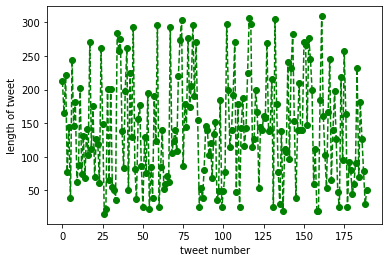

In [171]:
# Visualizing the tweet number and it's length
tweet_len = pd.Series(data = data['len'].values)
tweet_likes = pd.Series(data = data['Likes'].values)   #, index=data['Data'])
tweet_retweets = pd.Series(data = data['Re_tweets'].values) #, index=data['Data']

x = data.index
y = data['len']
plt.xlabel("tweet number")
plt.ylabel("length of tweet")
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x, y, 'go--')
plt.show()

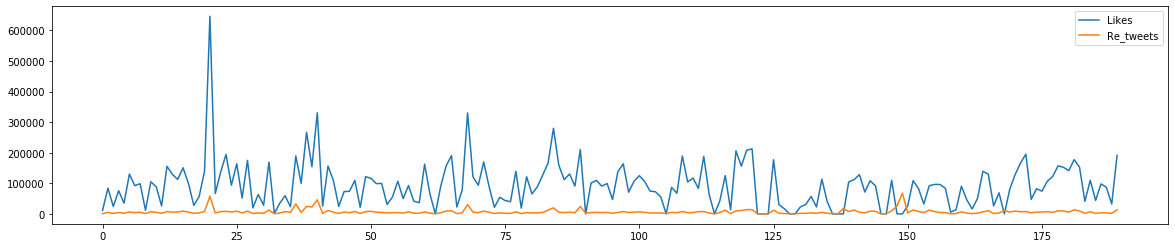

In [172]:
# Likes and retweets visualization

tweet_likes.plot(figsize=(20,4), label='Likes', legend=True)
tweet_retweets.plot(figsize=(20,4), label='Re_tweets', legend=True)

## Obtain source of tweets and visualize 

In [173]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
 
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android


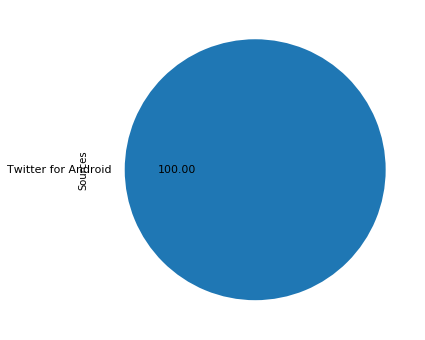

In [174]:
# Plotting the usage of sources:
percent = np.zeros(len(sources))
 
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
 
percent /= 100
 
# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6))

# Sentiment Analysis

### Data preprocessing

In [175]:
def remove_pattern(data, pattern):
    r = re.findall(pattern, data)
    for i in r:
        data = re.sub(i, '', data)
        
    return data   

In [176]:
# remove twitter handles (@user)
data['cleaned_tweets'] = np.vectorize(remove_pattern)(data['tweets'], "@[\w]*")

In [177]:
#Removing Punctuations, Numbers, and Special Characters
data['cleaned_tweets'] = data['cleaned_tweets'].str.replace("[^a-zA-Z#]", " ")
data['cleaned_tweets'] = data['cleaned_tweets'].str.replace("[https]", " ")

In [178]:
#Removing non-english words
def preprocess2(cleaned_tweets):
    stopword_set = set(stopwords.words("english"))
    return

In [179]:
#Removing Short Words
data['cleaned_tweets'] = data['cleaned_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data

,tweets,len,ID,Date,Source,Likes,Re_tweets,cleaned_tweets
0,Hey Skip @chetrisunil11 Gotta keep my scoring ...,212,1304714631710081026,2020-09-12 09:33:03,Twitter for Android,11134,932,coring reak like ecking your mailbox cricke de...
1,It's the small details that matter 👌. For me e...,165,1304345818955091968,2020-09-11 09:07:31,Twitter for Android,84337,5021,mall even crucial balance LOVE aking care
2,Wrogn Footwear just launched on @Flipkart and ...,221,1303940002506706944,2020-09-10 06:14:57,Twitter for Android,24204,1633,Wrogn wear launc really exci link below ready ...
3,Another productive day training. 🏏 A few days ...,77,1303717725827559425,2020-09-09 15:31:42,Twitter for Android,75905,4466,roduc raining more XMXAX
4,Off to a great start with #one8Innerwear 💪\n\n...,144,1302917421318119424,2020-09-07 10:31:34,Twitter for Android,35123,2173,grea #one Innerwear collec exdqMqITXY #one VvZCNH
...,...,...,...,...,...,...,...,...
185,"Stylish, elegant and classy. An absolute beast...",181,1219870407676678144,2020-01-22 06:32:23,Twitter for Android,44177,1902,elegan Audi Glad launc Balbir Sing illon Head ...
186,Top team gym session and a good meal out in be...,127,1219814892170964992,2020-01-22 02:51:48,Twitter for Android,98030,3678,good meal beau iful Auckland nAuA
187,Touchdown Auckland. Let’s go 🇮🇳 @imShard @Shre...,79,1219631268738084868,2020-01-21 14:42:08,Twitter for Android,86988,3605,Touc down Auckland
188,👊🏼👊🏼👊🏼 https://t.co/ot4qLbfkvM,30,1219175442898276352,2020-01-20 08:30:51,Twitter for Android,32675,1910,qLbfkvM


## Create Subjectivity and Polarity

In [180]:
# Create a function to get the subjectivity

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
data['Subjectivity'] = data['tweets'].apply(getSubjectivity)
data['Polarity'] = data['tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
data

,tweets,len,ID,Date,Source,Likes,Re_tweets,cleaned_tweets,Subjectivity,Polarity
0,Hey Skip @chetrisunil11 Gotta keep my scoring ...,212,1304714631710081026,2020-09-12 09:33:03,Twitter for Android,11134,932,coring reak like ecking your mailbox cricke de...,0.000000,0.000000
1,It's the small details that matter 👌. For me e...,165,1304345818955091968,2020-09-11 09:07:31,Twitter for Android,84337,5021,mall even crucial balance LOVE aking care,0.666667,0.083333
2,Wrogn Footwear just launched on @Flipkart and ...,221,1303940002506706944,2020-09-10 06:14:57,Twitter for Android,24204,1633,Wrogn wear launc really exci link below ready ...,0.625000,0.359375
3,Another productive day training. 🏏 A few days ...,77,1303717725827559425,2020-09-09 15:31:42,Twitter for Android,75905,4466,roduc raining more XMXAX,0.300000,0.150000
4,Off to a great start with #one8Innerwear 💪\n\n...,144,1302917421318119424,2020-09-07 10:31:34,Twitter for Android,35123,2173,grea #one Innerwear collec exdqMqITXY #one VvZCNH,0.687500,0.400000
...,...,...,...,...,...,...,...,...,...,...
185,"Stylish, elegant and classy. An absolute beast...",181,1219870407676678144,2020-01-22 06:32:23,Twitter for Android,44177,1902,elegan Audi Glad launc Balbir Sing illon Head ...,0.950000,0.325000
186,Top team gym session and a good meal out in be...,127,1219814892170964992,2020-01-22 02:51:48,Twitter for Android,98030,3678,good meal beau iful Auckland nAuA,0.700000,0.683333
187,Touchdown Auckland. Let’s go 🇮🇳 @imShard @Shre...,79,1219631268738084868,2020-01-21 14:42:08,Twitter for Android,86988,3605,Touc down Auckland,0.000000,0.000000
188,👊🏼👊🏼👊🏼 https://t.co/ot4qLbfkvM,30,1219175442898276352,2020-01-20 08:30:51,Twitter for Android,32675,1910,qLbfkvM,0.000000,0.000000


In [181]:
#Tokenization
#Now we will tokenize all the cleaned tweets in our dataset. 

tokenized_tweet = data['cleaned_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [coring, reak, like, ecking, your, mailbox, cr...
1    [mall, even, crucial, balance, LOVE, aking, care]
2    [Wrogn, wear, launc, really, exci, link, below...
3                        [roduc, raining, more, XMXAX]
4    [grea, #one, Innerwear, collec, exdqMqITXY, #o...
Name: cleaned_tweets, dtype: object

In [182]:
#Now let’s stitch these tokens back together.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['cleaned_tweets'] = tokenized_tweet

## Display words of tweets using wordcloud

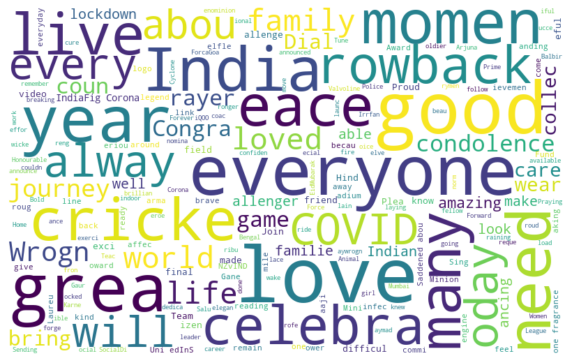

In [183]:
# Displaying all words of the tweets

all_words = ' '.join([text for text in data['cleaned_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

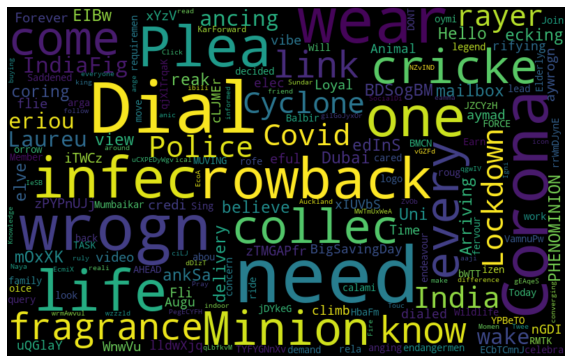

In [184]:
# non-racist/sexist words

normal_words =' '.join([text for text in data['cleaned_tweets'][data['Polarity'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

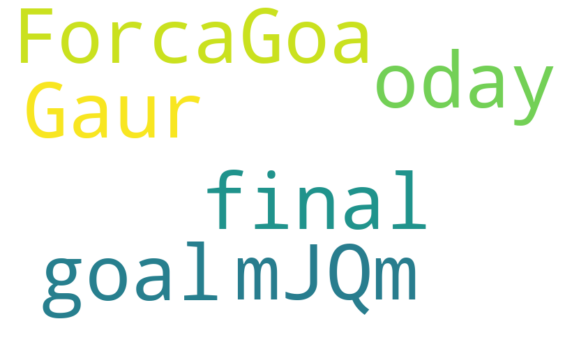

In [185]:
# Racist words

negative_words = ' '.join([text for text in data['cleaned_tweets'][data['Polarity'] == 1]])
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Function to compute negative, neutral and positive tweets

In [186]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
         return 'Positive'
data['Analysis'] = data['Polarity'].apply(getAnalysis)
# Show the dataframe
data

,tweets,len,ID,Date,Source,Likes,Re_tweets,cleaned_tweets,Subjectivity,Polarity,Analysis
0,Hey Skip @chetrisunil11 Gotta keep my scoring ...,212,1304714631710081026,2020-09-12 09:33:03,Twitter for Android,11134,932,coring reak like ecking your mailbox cricke de...,0.000000,0.000000,Neutral
1,It's the small details that matter 👌. For me e...,165,1304345818955091968,2020-09-11 09:07:31,Twitter for Android,84337,5021,mall even crucial balance LOVE aking care,0.666667,0.083333,Positive
2,Wrogn Footwear just launched on @Flipkart and ...,221,1303940002506706944,2020-09-10 06:14:57,Twitter for Android,24204,1633,Wrogn wear launc really exci link below ready ...,0.625000,0.359375,Positive
3,Another productive day training. 🏏 A few days ...,77,1303717725827559425,2020-09-09 15:31:42,Twitter for Android,75905,4466,roduc raining more XMXAX,0.300000,0.150000,Positive
4,Off to a great start with #one8Innerwear 💪\n\n...,144,1302917421318119424,2020-09-07 10:31:34,Twitter for Android,35123,2173,grea #one Innerwear collec exdqMqITXY #one VvZCNH,0.687500,0.400000,Positive
...,...,...,...,...,...,...,...,...,...,...,...
185,"Stylish, elegant and classy. An absolute beast...",181,1219870407676678144,2020-01-22 06:32:23,Twitter for Android,44177,1902,elegan Audi Glad launc Balbir Sing illon Head ...,0.950000,0.325000,Positive
186,Top team gym session and a good meal out in be...,127,1219814892170964992,2020-01-22 02:51:48,Twitter for Android,98030,3678,good meal beau iful Auckland nAuA,0.700000,0.683333,Positive
187,Touchdown Auckland. Let’s go 🇮🇳 @imShard @Shre...,79,1219631268738084868,2020-01-21 14:42:08,Twitter for Android,86988,3605,Touc down Auckland,0.000000,0.000000,Neutral
188,👊🏼👊🏼👊🏼 https://t.co/ot4qLbfkvM,30,1219175442898276352,2020-01-20 08:30:51,Twitter for Android,32675,1910,qLbfkvM,0.000000,0.000000,Neutral


In [187]:
data[['cleaned_tweets', 'Analysis']]

,cleaned_tweets,Analysis
0,coring reak like ecking your mailbox cricke de...,Neutral
1,mall even crucial balance LOVE aking care,Positive
2,Wrogn wear launc really exci link below ready ...,Positive
3,roduc raining more XMXAX,Positive
4,grea #one Innerwear collec exdqMqITXY #one VvZCNH,Positive
...,...,...
185,elegan Audi Glad launc Balbir Sing illon Head ...,Positive
186,good meal beau iful Auckland nAuA,Positive
187,Touc down Auckland,Neutral
188,qLbfkvM,Neutral


## Find the percentage and number of tweets and visualizing them

In [188]:

# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['Polarity'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['Polarity'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['Polarity'][index] < 0]

In [189]:

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweets'])))

Percentage of positive tweets: 58.94736842105263%
Percentage of neutral tweets: 34.21052631578947%
Percentage de negative tweets: 6.842105263157895%


In [190]:
data['Analysis'].value_counts()

Positive    112
Neutral      65
Negative     13
Name: Analysis, dtype: int64

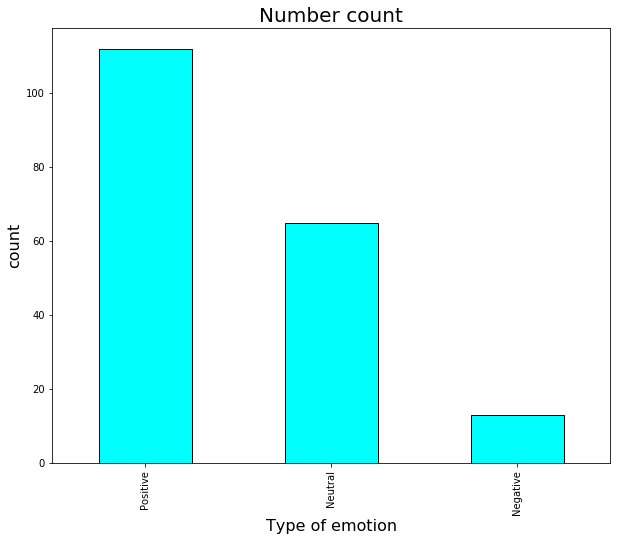

In [191]:
plt.title('Number count', fontsize=20)
plt.xlabel('Type of emotion', fontsize=16)
plt.ylabel('count', fontsize=16)
data['Analysis'].value_counts().plot(kind = 'bar', color='cyan', edgecolor='black')
plt.show()

## Display particular tweet and it's  emotion

In [192]:
data.iloc[120,[7, 10]]

cleaned_tweets    unreal unbelievable erday Irrfan oday acce leg...
Analysis                                                   Negative
Name: 120, dtype: object

In [193]:
data.iloc[10,[7, 10]]

cleaned_tweets    umidi grea recovery iGflXm
Analysis                            Positive
Name: 10, dtype: object

In [197]:
data.iloc[0,[7,10]]

cleaned_tweets    coring reak like ecking your mailbox cricke de...
Analysis                                                    Neutral
Name: 0, dtype: object